In [1]:
import pandas as pd
import os
import joblib
import numpy as np
random_state = 810
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb 

In [13]:
X_train = joblib.load("../artifacts/data_transformation/X_train.joblib")
y_train = joblib.load("../artifacts/data_transformation/y_train.joblib")
X_val = joblib.load("../artifacts/data_transformation/X_val.joblib")
y_val = joblib.load("../artifacts/data_transformation/y_val.joblib")

In [106]:
X_train.shape

(6079, 37)

In [107]:
y_train.shape

(6079,)

In [93]:
model = joblib.load("../artifacts/model_trainer/best_model.pkl")
param = joblib.load("../artifacts/model_trainer/best_model_params.pkl")
rmse = joblib.load("../artifacts/model_trainer/best_model_rmse.pkl")

In [3]:
columns = ["host_since",
            "host_is_superhost",
            "host_listings_count",
            "accommodates", 
            "private",
            "bathrooms",
            "beds", 
            "number_of_reviews", 
            "review_scores_rating",
            "availability_365",
            "minimum_nights",
            "room_type01",
            "room_type02",
            "room_type03",
            "room_type04",
            "neighbourhood1",
            "neighbourhood2",
            "neighbourhood3",
            "neighbourhood4",
            "neighbourhood5",
            "neighbourhood6",
            "neighbourhood7",
            "neighbourhood8",
            "neighbourhood9",
            "neighbourhood10",
            "neighbourhood11",
            "neighbourhood12",
            "neighbourhood13",
            "neighbourhood14",
            "neighbourhood15",
            "neighbourhood16",
            "neighbourhood17",
            "neighbourhood18",
            "neighbourhood19",
            "neighbourhood20",
            "neighbourhood21",
            "neighbourhood22"]


## 1) Random Forest

In [4]:
forest = RandomForestRegressor(random_state=random_state)
forest.fit(X_train,y_train)

RandomForestRegressor(random_state=810)

In [5]:
importances = forest.feature_importances_

In [6]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

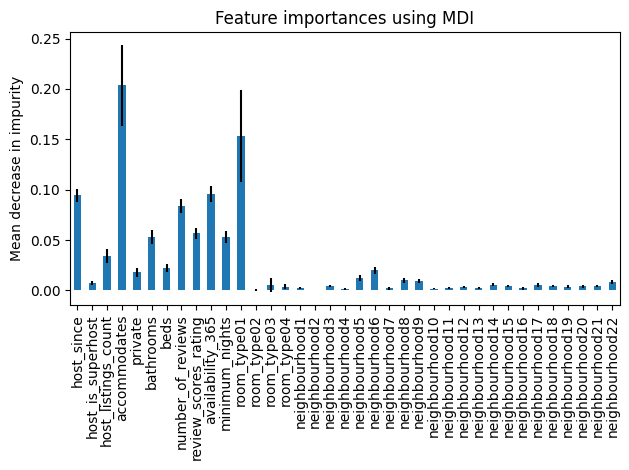

In [7]:
forest_importances = pd.Series(importances, index=columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [8]:
pred = forest.predict(X_val)

In [9]:
rmse = root_mean_squared_error(np.expm1(y_val), np.expm1(pred))
rmse

121.39724274319173

## 2) XGBoost 

In [55]:
from xgboost import XGBRegressor

In [69]:
xg_reg = XGBRegressor(base_score=0.5,eta=0.1,gamma=40)

In [70]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=40, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [71]:
y_pred = xg_reg.predict(X_val)
rmse = root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred))
rmse

142.19462413964

In [39]:
from sklearn.model_selection import cross_val_score

In [67]:
model = XGBRegressor(objective= "reg:squarederror")

In [90]:
# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return -root_mean_squared_error(y_true, y_pred)
from sklearn.metrics import make_scorer

# Create a scorer using the RMSE function
rmse_scorer = make_scorer(rmse, greater_is_better=False)
scores =cross_val_score(model, X_train, y_train,scoring=rmse_scorer,cv=5)

In [91]:
rmse =  np.expm1(scores)
rmse

array([0.56297437, 0.58709331, 0.57789627, 0.55616965, 0.51937797])

In [ ]:
preprocessor = joblib.load("../artifacts/data_transformation/data_transformer.joblib")

In [ ]:
input_data={"host_since" : 3500,
            "host_is_superhost": 0, 
            "host_listings_count": 13,
            "accommodates": 4,
            "private": 1,
            "bathrooms": 1,
            "beds": 2, 
            "number_of_reviews": 7, 
            "review_scores_rating": 5,
            "availability_365": 343,
            "minimum_nights": 1,
            "room_type": "private_room",
            "neighbourhood_cleansed": "geuzenveld_-_slotermeer"
            }